# Import

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing data

In [2]:
dataset = pd.read_csv('Placement_Dataset.csv')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Handling missing values

## Total Nan values in each column

In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Analyze distribution of data

e:\Important\Python\ML with Python\ML_with_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

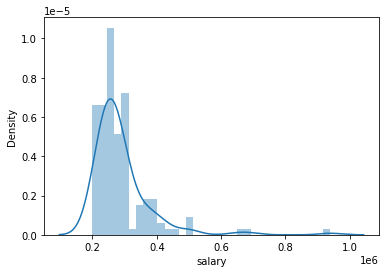

In [4]:
# fig,ax=plt.subplots(figsize=(10,10))
# sns.boxplot(dataset.salary)
#OR
sns.distplot(dataset.salary)

## (Imputation) Relpacing Nan values with central tendency

In [5]:
# Replace missing value with median
dataset['salary'].fillna(dataset['salary'].median(), inplace=True)

## Dropping

In [6]:
dataset_copy= pd.read_csv('Placement_Dataset.csv')

dataset_copy.dropna(inplace=True)

dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Data Standardization

## Imports

In [7]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Loading dataset from Sklearn

In [8]:
dataset=sklearn.datasets.load_breast_cancer() # Load dataset

## Convert to pandas dataframe
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [9]:
X=df
y=dataset.target

## Split train test

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape,y_train.shape)

(569, 30) (455, 30) (114, 30) (455,)


## Standardize

In [11]:
scaler=StandardScaler()
scaler.fit(X_train) # Fit(Compute mean and std) only to the training data
X_train_stand=scaler.transform(X_train) 
X_test_stand=scaler.transform(X_test)


# Label encoding

## Imports

In [12]:
from sklearn.preprocessing import LabelEncoder

## Label encoding of Breast Cancer dataset


### Loading dataset

In [13]:
cancer_df=pd.read_csv('breast_cancer.csv')
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Encoding label

In [14]:
label_encoder=LabelEncoder()
labels=label_encoder.fit_transform(cancer_df['diagnosis'])

### Appending encoded label to dataset

In [15]:
cancer_df['target']=labels
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


## Encoding Iris dataset

### Loading dataset

In [16]:
iris_df=pd.read_csv('iris_data.csv')
# iris_df.head()
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Encoding label

In [17]:
label_encoder1=LabelEncoder()
labels1=label_encoder1.fit_transform(iris_df['Species'])

### Appending encoded label to dataset

In [18]:
iris_df['target']=labels1
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


# Handling imbalanced Dataset

## load dataset

credit data from : https://drive.google.com/file/d/1WkcjUn5tVJDUtkN6d2_gztiT1FmIIVDP/view

In [22]:
credit_df=pd.read_csv('credit_data.csv')
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

0>>>Legit

1>>>>>Fraud

## Seperating data according to Class

In [23]:
legit= credit_df[credit_df.Class==0]
fraud= credit_df[credit_df.Class==1]

print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


## Under-sampling

Here the class having a larger number of datasets is sampled to match the distribution of class having less no of the dataset.

In [24]:
legit_sample_df=legit.sample(n=492) # Random Sample size is 492 from the legit dataset
print(legit_sample_df.shape)

(492, 31)


## Concat legit_sample and fraud 

In [31]:
credit_sample_df=pd.concat([legit_sample_df,fraud], axis=0)


# Feature Extraction of text data

Mapping of text data to numeric data(vectorization)-> Feature extraction